<span style = "font-family:Times New Roman"><span style="font-size: 20px;"><span style="color:red">Note: Please run this file on windows. Might not work on MacOS.</span>

# <span style = "font-family:Times New Roman"><span style="font-size: 30px;">Alireza Mir</span>
# Investment Analysis Bussiness 3273, Fall 2021

-----------------------------------------

# Modelling Assignment 4: <span style = "font-family:Times New Roman"><span style="font-size: 30px;"><span style="color:green">Python Modelling</span>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import scipy.stats as sct

In [5]:
from scipy.stats import skew

In [6]:
from scipy.stats import kurtosis

In [7]:
from scipy.stats import t

In [8]:
import pylab as p 

In [9]:
import colorama

In [10]:
from colorama import Fore

In [11]:
data = pd.read_excel(r"\Users\User\Desktop\Python Data\Assign 4.xlsx", index_col="Date")

In [12]:
data.head()

,ATA,DML,AEM,ATD.B,ABX,ACO.X,BLDP,BMO,BNS,NA,...,IFP,D.UN,TRQ,CIGI,GSY,SRU.UN,NWC,CCA,TSXComp,GoC10YR
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,22.56,0.17,10.60,0.43,25.75,9.95,40.75,24.65,15.52,9.25,...,3.95,10.19,6.87,5.17,10.33,0.11,4.25,26.90,8413.75,6.246
2000-01-07,22.10,0.16,10.50,0.42,25.25,9.56,56.15,23.45,15.50,8.95,...,4.75,9.42,6.34,5.58,8.67,0.11,3.90,24.05,8429.42,6.400
2000-01-14,22.94,0.15,10.50,0.42,24.65,9.62,64.80,23.07,14.77,8.85,...,5.15,8.72,6.14,4.80,7.00,0.11,3.92,27.00,8357.46,6.474
2000-01-21,20.98,0.14,10.25,0.43,24.65,7.37,112.50,21.63,14.30,8.40,...,5.00,8.51,6.74,4.67,7.00,0.09,3.92,29.25,8634.91,6.580
2000-01-28,20.94,0.12,9.35,0.44,23.65,7.87,81.90,24.02,15.00,8.65,...,4.85,7.32,6.00,4.54,7.33,0.08,3.92,31.00,8390.40,6.526


--------------------------------------

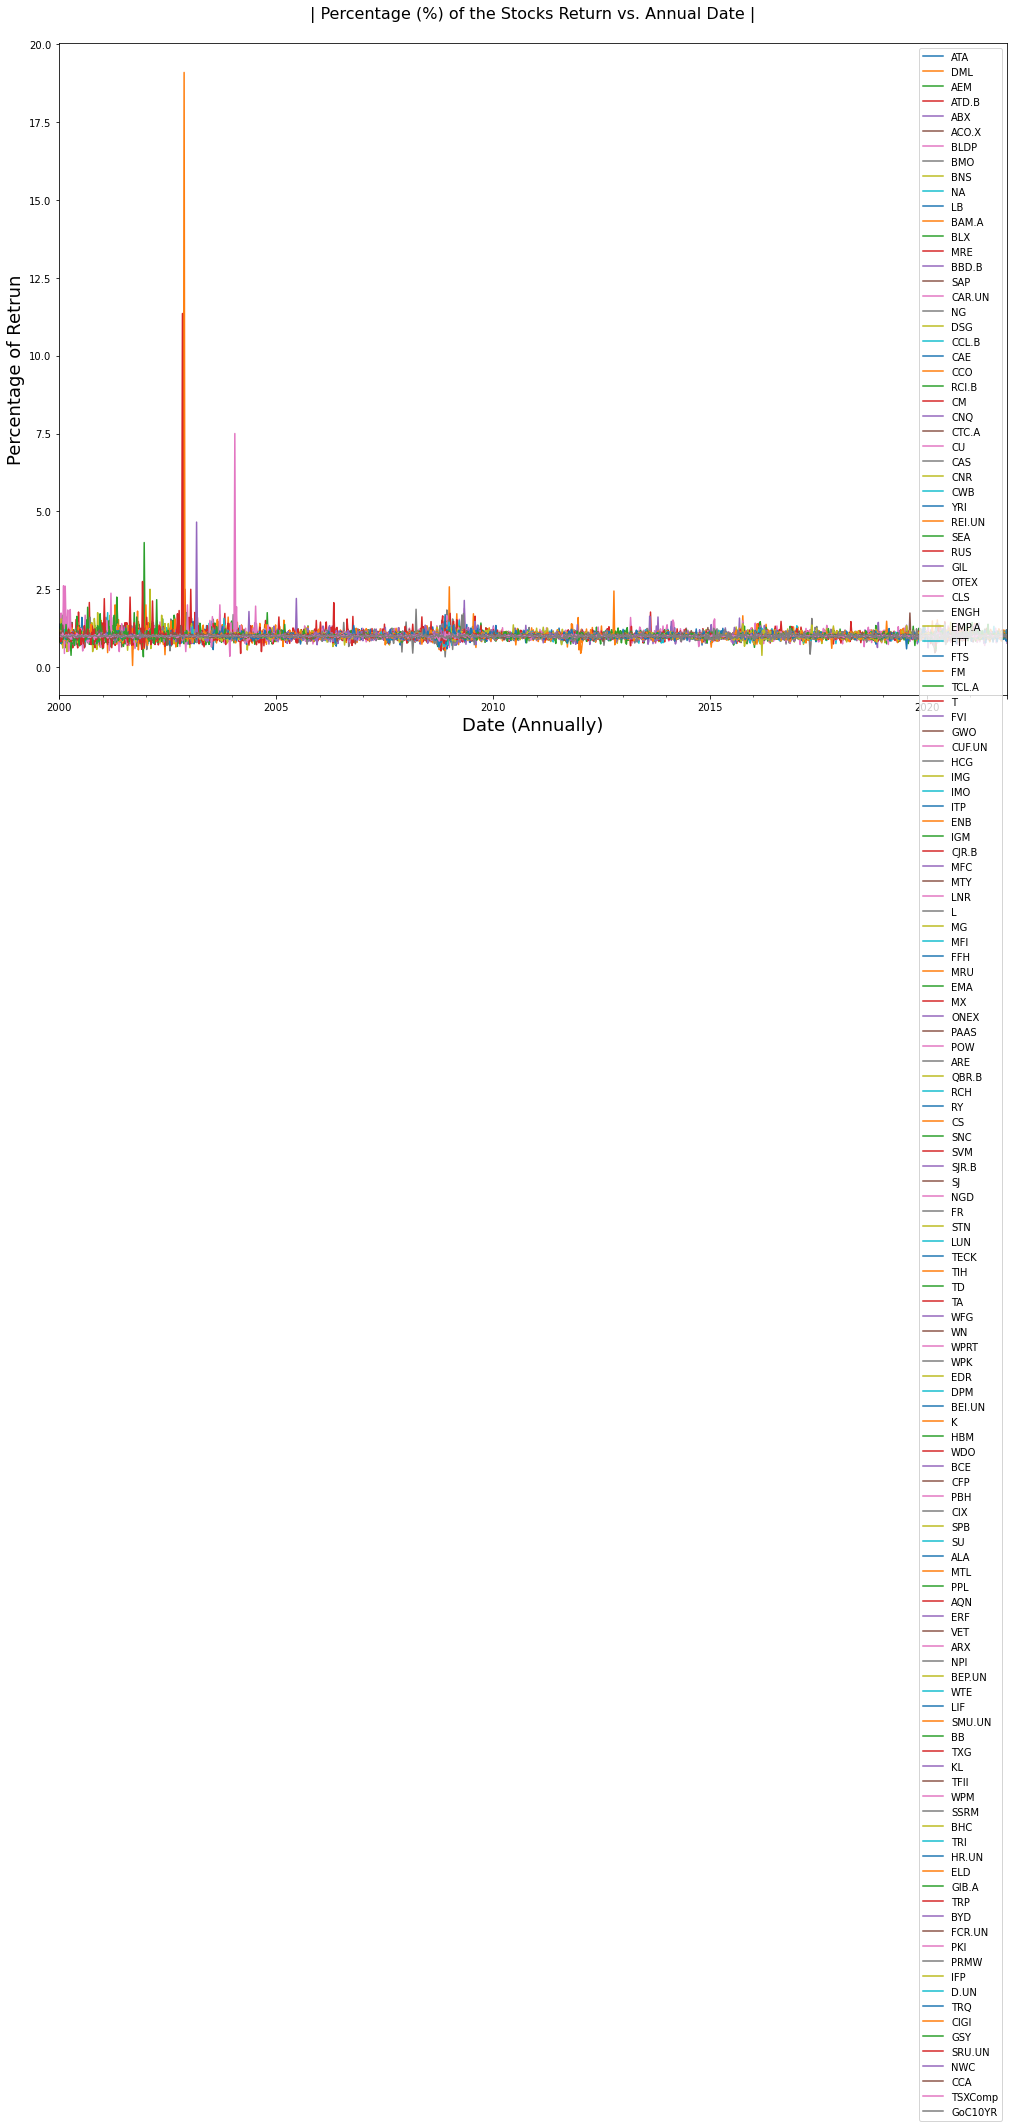

In [13]:
returns = (data / data.shift(1))
returns.plot(figsize = (17,12));
plt.title('| Percentage (%) of the Stocks Return vs. Annual Date |\n',fontsize=16)
plt.xlabel('Date (Annually)',fontsize=18)
plt.ylabel('Percentage of Retrun',fontsize=18)
plt.legend(loc='upper right')
plt.show()

------------------------------------------------------

# Model 4a: Risk and Return Calculations

In [14]:
average_return = returns.mean()-1
average_annual_return = (1 + average_return)**365 -1

Enter Stock Symbol: ATA

I) Arithmetic Annual Return: 143.99%

II) Geometric Annual Return: 29.03%

III) Annualized Volatility: 1.11%

IV) Skewness for data: ATA   -0.042
dtype: float64

V) Kurtosis for data: ATA    4.597
dtype: float64

VI) Coefficient of variation: 0.00245

VII) 90% Confidence Interval:  1.43987

VIII) This graph representing the growth of $100 invested in the ATA stock on the first day through the last day.


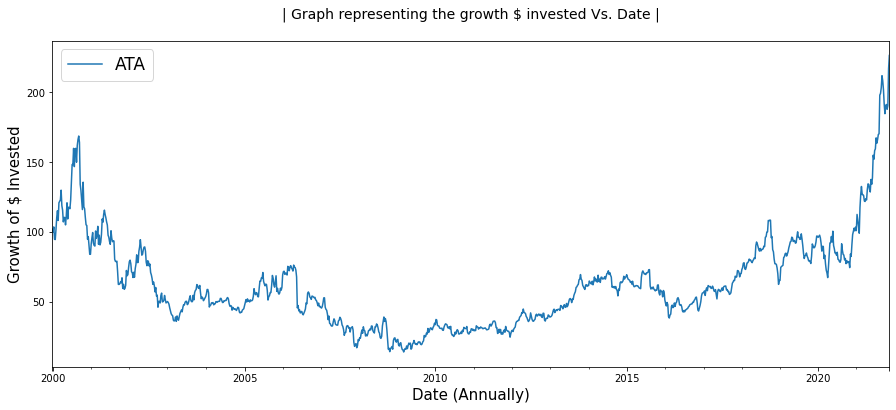

In [15]:
stock1 = input("Enter Stock Symbol: ")
x = (average_annual_return[stock1])
y = (returns[1:][stock1])

print ('\nI) Arithmetic Annual Return: ' + str(round(x*100,2))+"%")

gm = sct.mstats.gmean(y)-1
gm_annualized = (1+gm)**365-1
print('\nII) Geometric Annual Return: ' + str(round(gm_annualized*100,2)) + "%")

daily_std = sct.mstats.gmean(y)-1
std1 = daily_std * 252 ** 0.5
print ('\nIII) Annualized Volatility: ' + str(round(std1*100,2)) + "%")

skewness = (y)
df = pd.DataFrame(data=skewness) * 52
print('\nIV) Skewness for data:', round(df.skew(), 3))

kurtosis = (y)
df = pd.DataFrame(data=kurtosis) * 52
print('\nV) Kurtosis for data:', round(df.kurtosis(), 3))

D1 = (average_return[stock1])
cv1 = lambda D1: np.std(D1, ddof=1) / np.mean(D1) * 52
print ('\nVI) Coefficient of variation:', round(D1, 5))


m = x.mean()
s = x.std()
dof = (x)-1
confidence = 0.90
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
print ('\nVII) 90% Confidence Interval: ', round((m-s*t_crit/np.sqrt(x)), 5))


print ('\nVIII) This graph representing the growth of $100 invested in the', Fore.RED +str(stock1), Fore.RESET +'stock on the first day through the last day.')
(data[stock1] / data[stock1].iloc[1] * 100).plot(figsize = (15, 6));
plt.title('| Graph representing the growth $ invested Vs. Date |\n', fontsize=14)
plt.xlabel('Date (Annually)',fontsize=15)
plt.ylabel('Growth of $ Invested',fontsize=15)
plt.legend(loc='upper left', fontsize=17)
plt.show()

---------------------------------------------

# Model 4b: Basic Stock Comparison

<span style = "font-family:Times New Roman"><span style="font-size: 20px;"> With this feature, user can compare two different stocks by typing on each Model 4a and Model 4b.</span>

In [16]:
average_return = returns.mean()-1
average_annual_return = (1 + average_return)**365 -1

Enter Stock Symbol: RUS

I) Arithmetic Annual Return: 188.54%

II) Geometric Annual Return: 103.97%

III) Annualized Volatility: 3.1%

IV) Skewness for data: RUS   -0.129
dtype: float64

V) Kurtosis for data: RUS    4.965
dtype: float64

VI) Coefficient of variation: 0.00291

VII) 90% Confidence Interval:  1.88544

VIII) This graph representing the growth of $100 invested in the RUS stock on the first day through the last day.


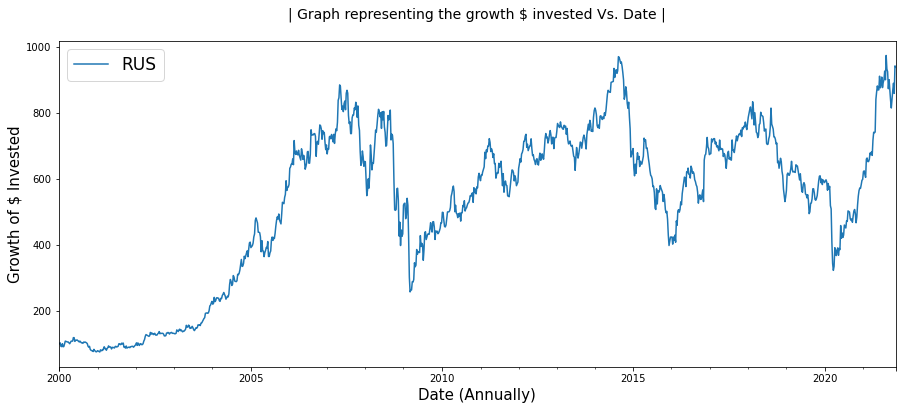

In [17]:
stock2 = input("Enter Stock Symbol: ")
x = (average_annual_return[stock2])
y = (returns[1:][stock2])

print ('\nI) Arithmetic Annual Return: ' + str(round(x*100,2))+"%")

gm = sct.mstats.gmean(y)-1
gm_annualized = (1+gm)**365-1
print('\nII) Geometric Annual Return: ' + str(round(gm_annualized*100,2)) + "%")

daily_std = sct.mstats.gmean(y)-1
std = daily_std * 252 ** 0.5
print ('\nIII) Annualized Volatility: ' + str(round(std*100,2)) + "%")

skewness = (y)
df = pd.DataFrame(data=skewness) * 52
print('\nIV) Skewness for data:', round(df.skew(), 3))

kurtosis = (y)
df = pd.DataFrame(data=kurtosis) * 52
print('\nV) Kurtosis for data:', round(df.kurtosis(), 3))

D2 = (average_return[stock2])
cv2 = lambda D2: np.std(D2, ddof=1) / np.mean(D2) * 52
print ('\nVI) Coefficient of variation:', round(D2, 5))

m = x.mean()
s = x.std()
dof = (x)-1
confidence = 0.90
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
print ('\nVII) 90% Confidence Interval: ',round((m-s*t_crit/np.sqrt(x)), 5))


print ('\nVIII) This graph representing the growth of $100 invested in the', Fore.RED +str(stock2), Fore.RESET +'stock on the first day through the last day.')
(data[stock2] / data[stock2].iloc[1] * 100).plot(figsize = (15, 6));
plt.title('| Graph representing the growth $ invested Vs. Date |\n', fontsize=14)
plt.xlabel('Date (Annually)',fontsize=15)
plt.ylabel('Growth of $ Invested',fontsize=15)
plt.legend(loc='upper left', fontsize=17)
plt.show()

------------------------

<span style = "font-family:Times New Roman"><span style="font-size: 20px;"><span style="color:red"> - Comparing which stock is more efficient to invest</span>

In [18]:
if ( D1 < D2 ):
    print('Stock',Fore.RED+str(stock1),Fore.RESET+'is more efficient to invest than stock',Fore.RED+str(stock2),Fore.RESET)
else:
    print('Stock',Fore.RED+str(stock2),Fore.RESET+'is more efficient to invest than stock',Fore.RED+str(stock1),Fore.RESET)

Stock ATA is more efficient to invest than stock RUS 


-----------------------------------

# Model 4c: CAPM

In [23]:
tickers = input("Enter Stock Symbol: ")

cov = np.divide(data[tickers], data[tickers].shift(1)) - 1
var = np.divide(data["TSXComp"], data["TSXComp"].shift(1)) - 1
beta, intercept = np.polyfit(var[1:len(var)], cov[1:len(var)], 1)
print("\nI) Beta for", tickers, "=", round(beta, 4))

risk_free_return = data[tickers].mean() 
market_return = returns[tickers].mean()
expected_return = risk_free_return + beta*(market_return - risk_free_return)
print ("\nII) Expected Return for", tickers, "=", round(expected_return, 5))

Enter Stock Symbol: ATA

I) Beta for ATA = 1.0818

II) Expected Return for ATA = -0.03956


-------------------------------